# Trabalho Prático 2 - Introdução à Computação Visual 

### Isadora Cristina

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import OpenGL.GLU as glu
import OpenGL.GL as gl
import OpenGL.GLUT as glut
import cv2

### 1. Calibração da câmera

In [2]:
# A calibração da câmera foi feita pelo Matlab 
# De forma semelhante à atividade prática, foi usada a ferramenta "Camera Calibration Toolbox for Matlab"
# Link do tutorial usado: http://www.vision.caltech.edu/bouguetj/calib_doc/htmls/example.html
# Como foi passado um vídeo, foram retirados deles frames em momentos arbitrários
# Assim, obtivemos sobre os parâmetros:

# focal length
foc_len = [884.21764, 895.52706]
# principal point
prin_pon = [511.15701, 389.61393]
# distortion
distortion = [0.07162, -0.21749, -0.01365, 0.00146, 0.0]

In [3]:
# Agora podemos criar a matriz de parâmetros intrínsecos
mat_int = np.array([[foc_len[0], 0.0, 320], [0.0, foc_len[1], 240], [0.0, 0.0, 1.0]])

mat_int

array([[884.21764,   0.     , 320.     ],
       [  0.     , 895.52706, 240.     ],
       [  0.     ,   0.     ,   1.     ]])

### 2. Detecção e Localização da Posição e Orientação do Alvo em cada Frame 

In [4]:
# Leitura do vídeo de entrada
video = cv2.VideoCapture('entrada.mp4')
frames = []
# Obtenção dos frames
while video.isOpened():
    ret, frame = video.read()
    if ret == False:
        break
    else:
        frames.append(frame)
        
print("Quantidade de frames obtidos:", len(frames))

Quantidade de frames obtidos: 1100


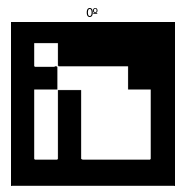

In [5]:
# Agora vamos ler o alvo
target = cv2.imread('alvo.jpg', 0)

# Binarizamos o alvo para facilitar o processamento
_, target = cv2.threshold(target, 80, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (3,3))
plt.imshow(target, cmap='gray'); 
plt.title('0º')
plt.xticks([]); 
plt.yticks([])
plt.show()

([], [])

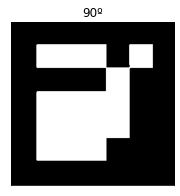

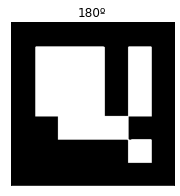

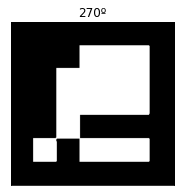

In [6]:
# Com o alvo em mãos, vamos achar as suas rotações de 90°
target90 = cv2.rotate(target, cv2.ROTATE_90_CLOCKWISE) # 90°
target180 = cv2.rotate(target, cv2.ROTATE_180) # 180°
target270 = cv2.rotate(target, cv2.ROTATE_90_COUNTERCLOCKWISE) # 270°

plt.figure(figsize = (3,3))
plt.imshow(target90, cmap='gray')
plt.title('90º')
plt.xticks([]); 
plt.yticks([])
plt.figure(figsize = (3,3))
plt.imshow(target180, cmap='gray')
plt.title('180º')
plt.xticks([]); 
plt.yticks([])
plt.figure(figsize = (3,3))
plt.imshow(target270, cmap='gray')
plt.title('270º')
plt.xticks([]); 
plt.yticks([])

In [7]:
# Definimos coordenadas arbitrárias de forma a indetificar cada orientação
p1 = [-1, -1, 0]
p2 = [1, -1, 0]
p3 = [1, 1, 0]
p4 = [-1, 1, 0]

coords = []

coords.append(np.float32([p1, p2, p3, p4])) # 90°
coords.append(np.float32([p4, p1, p2, p3])) # 0°
coords.append(np.float32([p3, p4, p1, p2])) # 270°
coords.append(np.float32([p2, p3, p4, p1])) # 180°

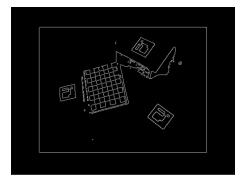

In [21]:
# Para efeito de visualização de como os frames serão tratador
# Vamos fazer cada passo com apenas 1 frame e plotar os resultados
# Queremos destacar os contornos para achar polígonos em seguida
def treat_color(frame):
    # Deixamos cada frame com tons de cinza
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Fazemos a binarização
    _, frame = cv2.threshold(frame, 127, 255, cv2.THRESH_BINARY)
    # Extraímos as bordas
    frame = cv2.Canny(frame, 60, 100)
    # Encontra os contornos    
    contour, _ = cv2.findContours(frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    return frame, contour

sample, contours = treat_color(frames[10])

plt.figure(figsize = (4,4))
plt.imshow(sample,cmap = 'gray')
plt.xticks([]); 
plt.yticks([])
plt.show()

In [32]:
# Com os contorno obtidos, seguimos para fazer a identificação de polígonos
def find_polygons(frame, contours):
    tetra = []
    # Criamos poligono com os contorno obtidos na função acima
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        polygon = cv2.approxPolyDP(contour, 0.015*perimeter, True)
        if len(polygon) == 4 and cv2.isContourConvex(polygon):
            tetra.append(polygon)
    return tetra    

tetra = find_polygons(frame, contours)
tetra

[array([[[ 81,  61]],
 
        [[ 81, 418]],
 
        [[558, 418]],
 
        [[557,  60]]], dtype=int32)]

In [ ]:
# Agora vamos achar a matriz de homografia 

### 3.

### 4.